In [22]:
""" First, let's import the data.
    It comes stock with scikit-learn.
"""
# load test data set
from sklearn.datasets import load_iris
iris = load_iris()

x_iris = iris.data
y_iris = iris.target

#x = x_iris[:, :2]
x = x_iris
y = y_iris

# split data set into test and real sets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test = train_test_split(x, test_size=0.25, random_state=33)
y_train, y_test = train_test_split(y, test_size=0.25, random_state=33)

# normalize test data so each feature has a mean of 0.0 and a std dev of 1.0
scaler_x = StandardScaler().fit(x_train)
x_train = scaler_x.transform(x_train)
x_test = scaler_x.transform(x_test)


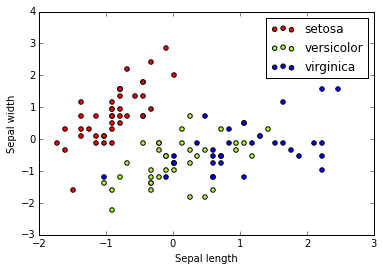

In [2]:
""" Now let's just make a quick plot of the data
    to take a look at it.
"""
%matplotlib inline
import matplotlib.pyplot as plt
colors = ['red', 'greenyellow', 'blue']

for i in range(len(colors)):
    xs = x_train[:, 0][y_train == i]
    ys = x_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])

plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


In [3]:
""" Supervised Learning: Stochiast Gradient Descent linear
    fit model to classify the iris data into two groups.
"""
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
clf.fit(x_train, y_train)

print(clf.coef_)
print(clf.intercept_)

[[-30.0529983   20.49537864]
 [  3.1011287  -11.60435741]
 [ 15.65204872   2.71333618]]
[-18.71823219   4.08177034  -4.21087009]


(-2, 2.5)

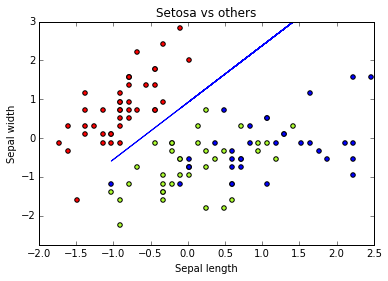

In [4]:
""" Okay, so what we have above are the parameters to fit three different lines.
    These lines represent the split of the tree different types of irisses.
    But to my eye, only the red is really well separated from the others,
    so we'll just plot the one more interesting fit line.
"""
import numpy as np

x_min = x_train[:, 0].min() - 0.5
x_max = x_train[:, 0].max() + 0.5
y_min = x_train[:, 1].min() - 0.5
y_max = x_train[:, 1].max() + 0.5

xs = np.arange(x_min, x_max, 0.5)

colors = ['red', 'greenyellow', 'blue']

for i in range(len(colors)):
    xs = x_train[:, 0][y_train == i]
    ys = x_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])

ys = (-clf.intercept_[0] - xs * clf.coef_[0, 0]) / clf.coef_[0, 1]
plt.plot(xs, ys, hold=True)

plt.title('Setosa vs others')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.ylim(-2.75, 3)
plt.xlim(-2, 2.5)

In [5]:
""" Let's use our new classifier to predict a few new instances """
print(clf.predict(scaler_x.transform([[2.0, 0.1]])))
print(clf.predict(scaler_x.transform([[0.0, -3.1]])))
print(clf.predict(scaler_x.transform([[-1.3, 2.1]])))

[1]
[1]
[0]


In [6]:
""" Let's see how accurately it predicts the training data. """
from sklearn import metrics
y_train_pred = clf.predict(x_train)
print(metrics.accuracy_score(y_train, y_train_pred))

0.821428571429


In [7]:
""" Let's see how the classifier does on the testing data. """
y_pred = clf.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.736842105263


In [8]:
""" Let's try some additinoal measures: Precision, Recall and F-score, and show the confusion matrix """

print(metrics.classification_report(y_test, y_pred, target_names=iris.target_names))
print(metrics.confusion_matrix(y_test, y_pred))


             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.53      0.73      0.62        11
  virginica       0.80      0.63      0.71        19

avg / total       0.76      0.74      0.74        38

[[ 8  0  0]
 [ 0  8  3]
 [ 0  7 12]]


In [9]:
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.pipeline import Pipeline

# create a composite estimator made by a pipeline of the standarization and the linear model
clf = Pipeline([
        ('scaler', StandardScaler()),
        ('linear_model', SGDClassifier())
])
# create a k-fold cross validation iterator of k=5 folds
cv = KFold(x.shape[0], 5, shuffle=True, random_state=33)
# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(clf, x, y, cv=cv)
print(scores)

[ 0.7         0.76666667  0.73333333  0.76666667  0.86666667]


In [10]:
from scipy.stats import sem

def mean_score(scores):
    """Print the empirical mean score and standard error of the mean."""
    return ("Mean score: {0:.3f} (+/-{1:.3f})").format(
            np.mean(scores), sem(scores))

print(mean_score(scores))

Mean score: 0.767 (+/-0.028)


In [11]:
""" Unsupervised Learning: K-Means Clustering of the iris data
"""

from sklearn import cluster
clf_sepal = cluster.KMeans(init='k-means++', n_clusters=3, random_state=33)
clf_sepal.fit(x_train[:,0:2])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=33, tol=0.0001,
    verbose=0)

In [13]:
""" First, let's print the labels predicted for each data point by our K-means classifier.
"""
print(clf_sepal.labels_)

[1 0 1 1 1 0 0 1 0 2 0 0 1 2 0 2 1 2 1 0 0 1 1 0 0 2 0 1 2 2 1 1 0 0 2 1 0
 1 1 2 1 0 2 0 1 0 2 2 0 2 1 0 0 1 0 0 0 2 1 0 1 0 1 0 1 2 1 1 1 0 1 0 2 1
 0 0 0 0 2 2 0 1 1 2 1 0 0 1 1 1 0 1 1 0 2 1 2 1 2 0 2 0 0 0 1 1 2 1 1 1 2
 0]


In [15]:
""" Now let's look at the real values for each of these data points.
"""

print (y_train[clf_sepal.labels_ == 0])
print (y_train[clf_sepal.labels_ == 1])
print (y_train[clf_sepal.labels_ == 2])

[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
[1 1 1 1 1 1 2 1 0 2 1 2 2 1 1 2 2 1 2 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 1 2 1 1 2 1]
[2 2 1 2 2 2 2 1 1 2 2 1 2 2 1 1 2 2 2 2 2 2 1 2 2]


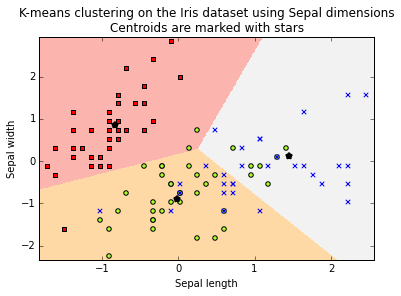

In [16]:
""" Okay, now let's make a plot of our new classifications """
colormarkers = [['red', 's'], ['greenyellow', 'o'], ['blue', 'x']]
step = 0.01 
margin = 0.1   
sl_min, sl_max = x_train[:, 0].min() - margin, x_train[:, 0].max() + margin
sw_min, sw_max = x_train[:, 1].min() - margin, x_train[:, 1].max() + margin
sl, sw  = np.meshgrid(np.arange(sl_min, sl_max, step),
                      np.arange(sw_min, sw_max, step))
zs = clf_sepal.predict(np.c_[sl.ravel(), sw.ravel()]).reshape(sl.shape)
centroids_s = clf_sepal.cluster_centers_

plt.figure(1)
plt.clf()
plt.imshow(zs, interpolation='nearest', extent=(sl.min(), sl.max(), sw.min(), sw.max()), cmap= plt.cm.Pastel1, aspect='auto', origin='lower')
for j in [0, 1, 2]:
    px = x_train[:, 0][y_train == j]
    py = x_train[:, 1][y_train == j]
    plt.scatter(px, py, c=colormarkers[j][0], marker= colormarkers[j][1])
plt.scatter(centroids_s[:, 0], centroids_s[:, 1], marker='*', linewidths=3, color='black', zorder=10)
plt.title('K-means clustering on the Iris dataset using Sepal dimensions\nCentroids are marked with stars')
plt.xlim(sl_min, sl_max)
plt.ylim(sw_min, sw_max)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()


In [24]:
""" Okay, that's not bad. But two of the types of Irises are heavily mixed.
    Let's try basing our analysis on petal dimensions.
"""
clf_petal = cluster.KMeans(init='k-means++', n_clusters=3, random_state=33)
clf_petal.fit(x_train[:,2:4])


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=33, tol=0.0001,
    verbose=0)

In [26]:
""" And, again, let's check and see the real values of our predictions """
print(y_train[clf_petal.labels_ == 0])
print(y_train[clf_petal.labels_ == 1])
print(y_train[clf_petal.labels_ == 2])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
[1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1]
[2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2]


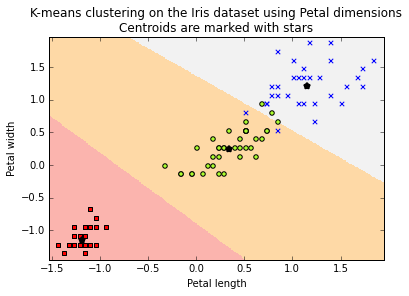

In [29]:
""" And again with the plotting... """


colormarkers = [['red', 's'], ['greenyellow', 'o'], ['blue', 'x']]
step = 0.01
margin = 0.1
sl_min, sl_max = x_train[:, 2].min() - margin, x_train[:, 2].max() + margin
sw_min, sw_max = x_train[:, 3].min() - margin, x_train[:, 3].max() + margin
sl, sw  = np.meshgrid(np.arange(sl_min, sl_max, step),
          np.arange(sw_min, sw_max, step),)
zs = clf_petal.predict(np.c_[sl.ravel(), sw.ravel()]).reshape(sl.shape)
centroids_s = clf_petal.cluster_centers_
plt.figure(1)
plt.clf()
plt.imshow(zs, interpolation='nearest', extent=(sl.min(), sl.max(), sw.min(), sw.max()), cmap= plt.cm.Pastel1, aspect='auto', origin='lower')
for j in [0,1,2]:
    px = x_train[:, 2][y_train == j]
    py = x_train[:, 3][y_train == j]
    plt.scatter(px, py, c=colormarkers[j][0], marker= colormarkers[j][1])
plt.scatter(centroids_s[:, 0], centroids_s[:, 1],marker='*',linewidths=3, color='black', zorder=10)
plt.title('K-means clustering on the Iris dataset using Petal dimensions\nCentroids are marked with stars')
plt.xlim(sl_min, sl_max)
plt.ylim(sw_min, sw_max)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()
